## Continuous Control: Reacher

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from agent import Agent
from model import ActorCriticNetwork

In [2]:
#load the reacher environment 
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64', worker_id=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# size of each state
state_size = brain.vector_observation_space_size
print('Size of each state:', state_size)

Number of agents: 20
Size of each action: 4
Size of each state: 33


In [4]:
def a2c(agent, num_agents, num_episodes=400):

    all_scores = []
    scores_window = deque(maxlen=100)

    for i_episode in range(1, num_episodes + 1):

        avg_score = agent.step()
        scores_window.append(avg_score)
        all_scores.append(avg_score)

        if i_episode % 25 == 0:
            print("Average score:", np.mean(scores_window), "at:", i_episode)

        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.network.state_dict(), 'solution.ckpt')
            break

    return all_scores


#build networks
agent = Agent(env, brain_name, num_agents, state_size, action_size)
scores = a2c(agent, num_agents)

/home/josh/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Average score: 2.085099953394383 at: 25
Average score: 6.1222698631566015 at: 50
Average score: 10.972433088080336 at: 75
Average score: 14.597964673710058 at: 100
Average score: 21.835374511941332 at: 125
Average score: 28.10707937175781 at: 150

Environment solved in 62 episodes!	Average Score: 30.11


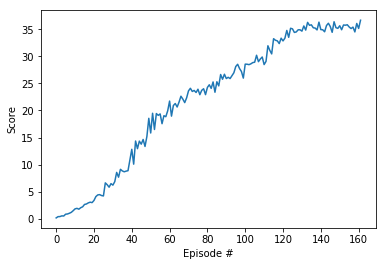

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
